<a href="https://colab.research.google.com/github/fundaylncii/NaturalLanguageProcessing/blob/main/NLPTextVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import TextBlob
from wordcloud import WordCloud

In [8]:
filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.width",200)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [9]:
import nltk
nltk.download("stopwords")
sw = stopwords.words("english")

nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [10]:
df = pd.read_csv("/content/amazon_reviews.csv")

In [11]:
## TextPreprocessing işleminin fonksiyonlaştırılması

def preprocess_text(text):
  ## metinleri küçük harfe çevirme
  text = text.str.lower()

  ## metin içerisinden noktalama işaretlerinin kaldırılması
  text = text.str.replace("[^\w\s]", "",regex=True)

  ## metin içerisinden sayısal değerlerin kaldırılması
  text = text.str.replace("\d","",regex=True)

  ## metin içerisinden örüntü oluşturmayacak sık sık kullanılan terimlerin çıkartılması (stopwords)
  text = text.apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

  ## metin içerisinde sıklık referansı 1 ve küçük olanların çıkartılması
  temp_df = pd.Series(" ".join(text).split()).value_counts()
  drop = temp_df[temp_df <= 1]
  text = text.apply(lambda x: " ".join(x for x in str(x).split() if x not in drop))

  ## metin içeriisndeki kelimeleri köklerine ayırma (stemming)
  text = text.apply(lambda x: " ".join([WordNetLemmatizer().lemmatize(word) for word in x.split()]))

  return text



In [12]:
df["reviewText"]

,reviewText
0,No issues.
1,"Purchased this for my device, it worked as adv..."
2,it works as expected. I should have sprung for...
3,This think has worked out great.Had a diff. br...
4,"Bought it with Retail Packaging, arrived legit..."
...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...
4911,Used this for extending the capabilities of my...
4912,Great card that is very fast and reliable. It ...
4913,Good amount of space for the stuff I want to d...


In [13]:
## reviewText alanının TextPreprocessing işlemine tabi tutma

df["reviewText"] = preprocess_text(df["reviewText"])
df["reviewText"]

,reviewText
0,issue
1,purchased device worked advertised never much ...
2,work expected higher capacity think made bit e...
3,think worked gb card went south one held prett...
4,bought retail packaging arrived legit envelope...
...,...
4910,bought sandisk gb class use htc inspire month ...
4911,used capability samsung galaxy note greatly ex...
4912,great card fast reliable come optional adapter...
4913,good amount space stuff want fit gopro say


In [16]:
## Terim Frekanslarının Hesaplanması:

## metin içerisindeki eşsiz kelimelerin frekanslarının oluşturulması

tf = df["reviewText"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ["words","tf"]

tf.head()

,words,tf
0,issue,609.00
1,purchased,344.00
2,device,584.00
3,worked,460.00
4,advertised,111.00


In [17]:
## azalan şekilde sıralama

tf.sort_values("tf", ascending=False)

,words,tf
27,card,5537.00
14,work,2044.00
7,phone,1909.00
39,gb,1756.00
98,great,1445.00
...,...,...
2723,headline,2.00
2722,sizethe,2.00
2720,everybody,2.00
3690,chkdsk,2.00


In [19]:
## BAR PLOT

## frekans değeri 500 den büyük olanların grafiklendirilmesi

tf[tf["tf"]>500].head(10)

,words,tf
0,issue,609.00
2,device,584.00
7,phone,1909.00
8,memory,1378.00
14,work,2044.00
26,note,514.00
27,card,5537.00
33,well,677.00
36,one,1120.00
39,gb,1756.00


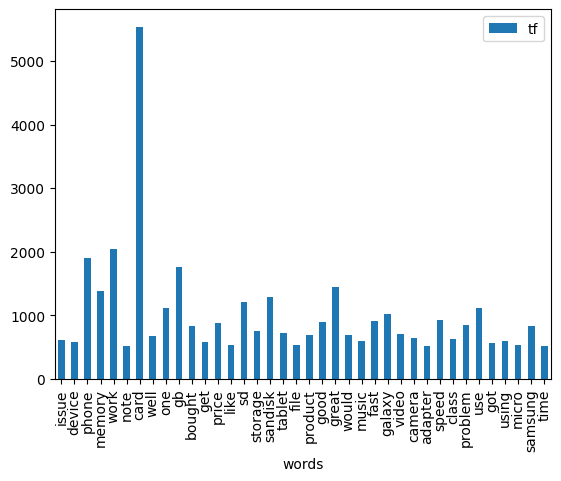

In [21]:
tf[tf["tf"]>500].plot.bar(x="words", y="tf")
plt.show()

In [24]:
## WORLD CLOUD

## WordCloud yapısı detaylı incelenebilir
## metin içerisindeki kelime frekanslarına göre bulut oluşturma
## tüm metni tek bir text gibi ifade edilmesi gerekmektedir.

text2 = " ".join(i for i in df.reviewText)
print(text2)

issue purchased device worked advertised never much phone memory since download lot stuff brainer work expected higher capacity think made bit earlier version paint look clean think worked gb card went south one held pretty well since note update ive month zero issue since transferred note note card reliable bought retail packaging arrived legit envelope version asian like picture show arrived quickly bought retail packaging htc one lg optimus card working order probably best price youll get nice sd card mini storage doesnt anything else supposed purchased add additional storage microsoft surface pro tablet come gb supposed sandisk long standing reputation speaks phone never skip beat file transfer speedy corruption issue memory issue would expect sandisk brand great card precious file slightly cheaper piece crap lose everything spending extra couple buck trusted product go good qa hard believe affordable digital become gb device one quarter postage stamp would less generation picked p

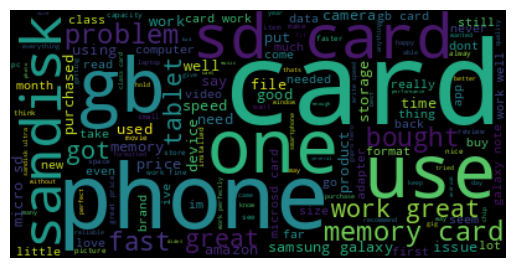

In [27]:
worldcloud = WordCloud().generate(text2)
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

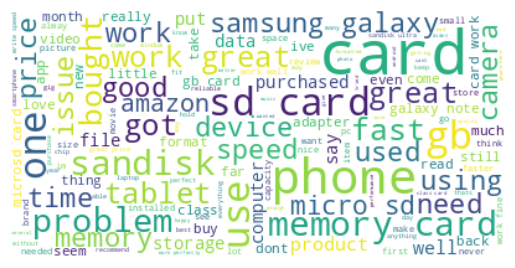

In [29]:
## Daha açık bir grafik - font sayısının belirlenmesi - gösterilecek max kelime sayısı

worldcloud = WordCloud(max_font_size=50,
                        max_words=200,
                        background_color="white").generate(text2)
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [30]:
## çıktının kaydedilmesi

worldcloud.to_file("worlcloud.png")

In [31]:
## ŞABLONA GÖRE WORLDCLOUD OLUŞTURMA
## BELİRLİ RESME GÖRE WORLD CLOUD OLUŞTURMA

tr_mask = np.array(Image.open("/content/tr.png"))

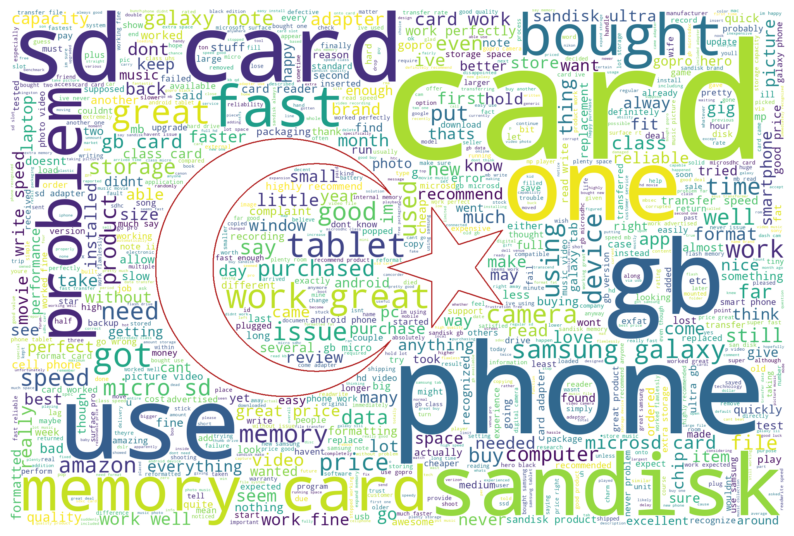

In [33]:
worldcloud = WordCloud(max_words=1000,
                       background_color="white",
                       mask=tr_mask,
                       contour_width=3,
                       contour_color="firebrick").generate(text2)
worldcloud.generate(text2)
plt.figure(figsize=[10,10])
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off")
plt.show()